In [33]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from utils import (overlay, predict_on_image)

In [34]:
model = YOLO('./models/5blocks/last.pt')

In [35]:
upper_sample = './sample_images/missing_sample.jpg'
lower_sample = './sample_images/lower_perfect1.jpg'
front_sample = './sample_images/front_missing1.JPG'

In [36]:
results = model.predict(source=upper_sample, conf=0.25)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 768x800 1 cy3l_upper, 2 cy3r_uppers, 1 first4_upper, 2 side3l_uppers, 313.4ms
Speed: 3.5ms preprocess, 313.4ms inference, 0.6ms postprocess per image at shape (1, 3, 768, 800)


In [37]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cy3l_lower', 1: 'cy3l_upper', 2: 'cy3r_lower', 3: 'cy3r_upper', 4: 'first4_lower', 5: 'first4_upper', 6: 'side3l_lower', 7: 'side3l_upper', 8: 'side3r_lower', 9: 'side3r_upper'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 25

In [38]:
img = cv2.imread(upper_sample)

In [39]:
# Process the results
for result in results:
    boxes = result.boxes  # Extract bounding boxes
    for box in boxes:
        # Get the coordinates of the bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        # Get the confidence score
        confidence = box.conf[0]
        # Get the class label
        class_id = int(box.cls[0])
        label = result.names[class_id]

        # Draw the bounding box and label on the image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

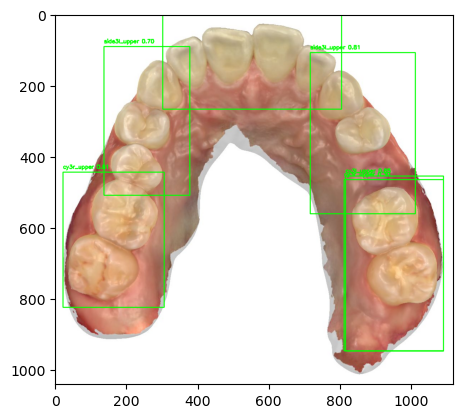

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

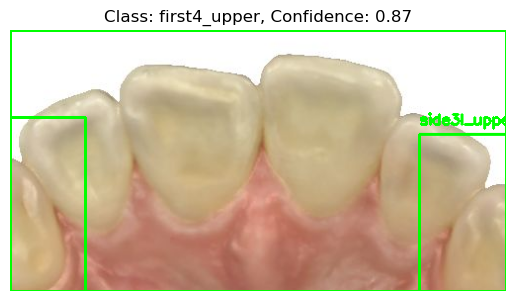

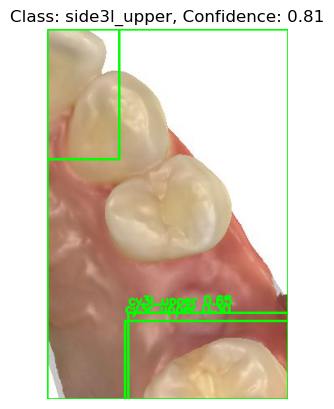

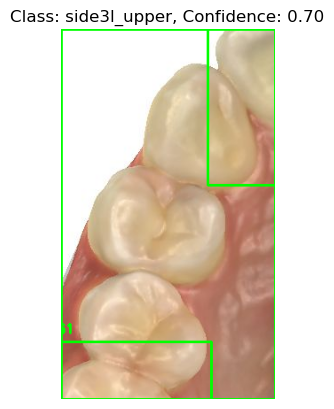

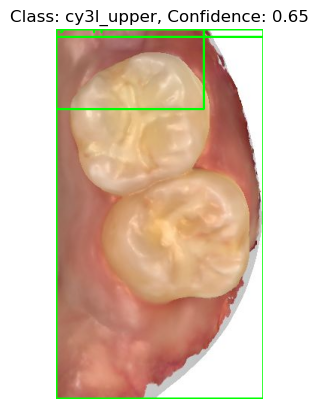

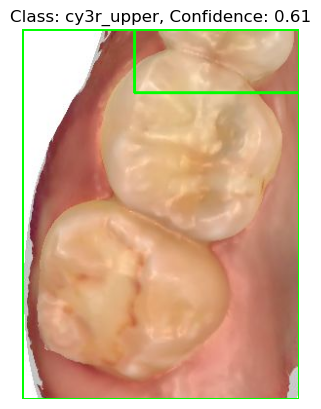

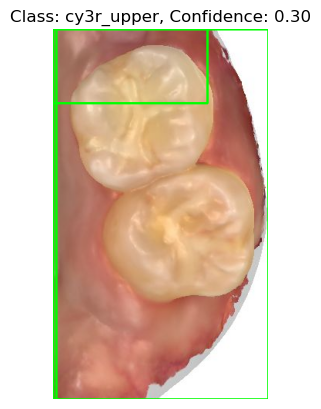

In [41]:
# Process the results
for idx, result in enumerate(results):
    boxes = result.boxes  # Extract bounding boxes
    for box_num, box in enumerate(boxes):
        # Get the coordinates of the bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        # Crop the bounding box from the image
        cropped_img = img[y1:y2, x1:x2]

        # Display the cropped image using plt.imshow()
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Class: {result.names[int(box.cls[0])]}, Confidence: {box.conf[0]:.2f}')
        plt.axis('off')
        plt.show()

In [42]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [48]:
# Load the image using OpenCV
img = cv2.imread(upper_sample)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

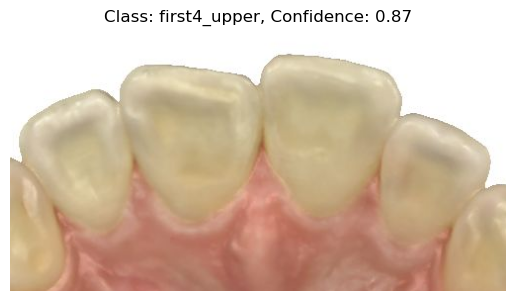

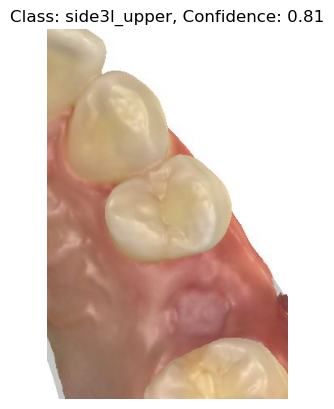

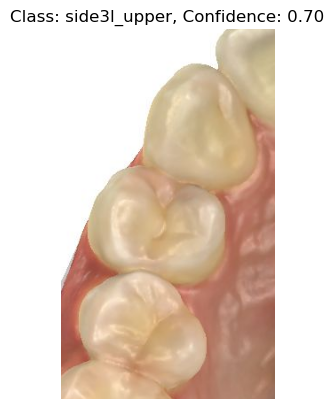

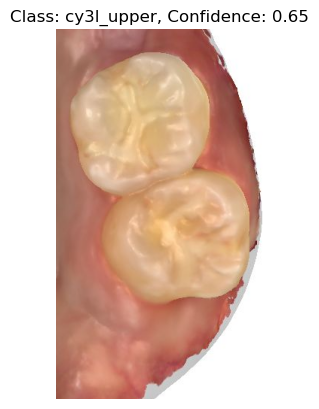

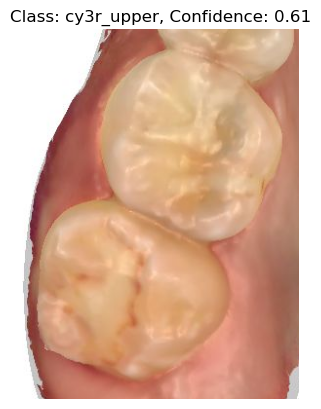

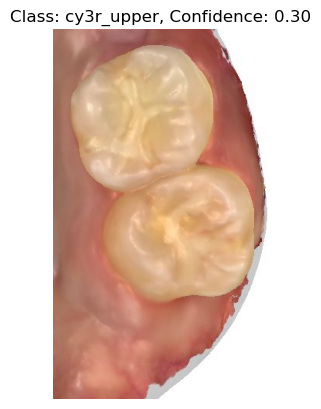

In [49]:
for idx, result in enumerate(results):
    boxes = result.boxes  # Extract bounding boxes
    for box_num, box in enumerate(boxes):
        # Get the coordinates of the bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        # Crop the bounding box from the image
        cropped_img = img_rgb[y1:y2, x1:x2]

        # Display the cropped image using plt.imshow()
        plt.imshow(cropped_img)
        plt.title(f'Class: {result.names[int(box.cls[0])]}, Confidence: {box.conf[0]:.2f}')
        plt.axis('off')
        plt.show()

In [56]:
model_segment = YOLO('./models/singletooth_segement/last.pt')

In [57]:
def showing_masking(img):
    boxes, masks, cls, probs = predict_on_image(model_segment, img)

    # overlay masks on original image
    image_with_masks = np.copy(img)
    for mask_i in masks:
        image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)

    return image_with_masks


0: 352x640 (no detections), 202.4ms
Speed: 1.7ms preprocess, 202.4ms inference, 0.2ms postprocess per image at shape (1, 3, 352, 640)

0: 640x448 1 tooth, 221.9ms
Speed: 1.5ms preprocess, 221.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
(1, 640, 448)
(453, 295, 1)


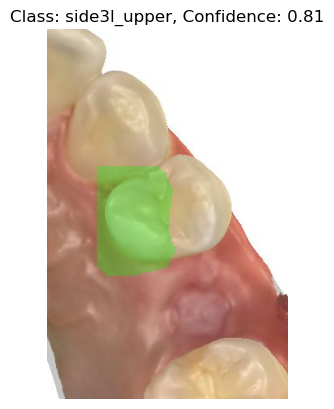


0: 640x384 (no detections), 157.9ms
Speed: 1.2ms preprocess, 157.9ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 142.1ms
Speed: 1.4ms preprocess, 142.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 (no detections), 202.4ms
Speed: 1.2ms preprocess, 202.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 480)

0: 640x384 (no detections), 176.4ms
Speed: 3.6ms preprocess, 176.4ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 384)


In [58]:
for idx, result in enumerate(results):
    boxes = result.boxes  # Extract bounding boxes
    for box_num, box in enumerate(boxes):
        # Get the coordinates of the bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        # Crop the bounding box from the image
        cropped_img = img_rgb[y1:y2, x1:x2]
        
        try:
            image_with_mask = showing_masking(cropped_img)
        except:
            continue

        # Display the cropped image using plt.imshow()
        plt.imshow(image_with_mask)
        plt.title(f'Class: {result.names[int(box.cls[0])]}, Confidence: {box.conf[0]:.2f}')
        plt.axis('off')
        plt.show()